# Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file = '/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/tests/results.txt'
df = pd.read_csv(file, sep=' ', header=None)
df.columns = ['test', 'kappa', 'time']
df[['mission', 'world', 'distance', 'stride']] = df.test.str.split("-", expand=True)
df['distance'] = df['distance'].astype(float)
df['stride'] = df['stride'].astype(float)
df = df.drop(columns=['test'])
df = df[['mission', 'world', 'distance', 'stride', 'kappa', 'time']]
df

,mission,world,distance,stride,kappa,time
0,peinture_au_rouleau,test_model_5,6.0,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_5,3.0,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_8,6.0,NaN,0.15,216.47
...,...,...,...,...,...,...
136,ski_nordique,test_model_11_complex,2.0,1.0,0.79,1100.34
137,ski_nordique,test_model_11_complex,2.0,2.0,0.71,1250.08
138,ski_nordique,test_model_11_complex,2.0,3.0,0.70,1432.01
139,ski_nordique,test_model_11_complex,2.0,6.0,0.66,1962.81


## Peinture au rouleau

In [154]:
df_par = df.loc[df['mission'] == 'peinture_au_rouleau']
df_par

,mission,world,distance,stride,kappa,time
0,peinture_au_rouleau,test_model_5,6.0,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_5,3.0,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_8,6.0,NaN,0.15,216.47
5,peinture_au_rouleau,test_model_8,3.0,NaN,0.44,251.97
6,peinture_au_rouleau,test_model_8,2.0,NaN,0.62,338.82
7,peinture_au_rouleau,test_model_8,1.0,NaN,0.73,551.11
8,peinture_au_rouleau,test_model_11,6.0,NaN,0.09,216.59
9,peinture_au_rouleau,test_model_11,3.0,NaN,0.25,254.39


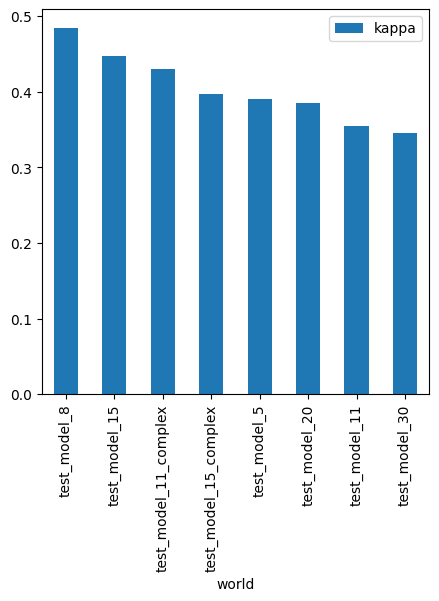

In [155]:
# kappa vs world
df_par.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world.png', bbox_inches='tight')
plt.show()

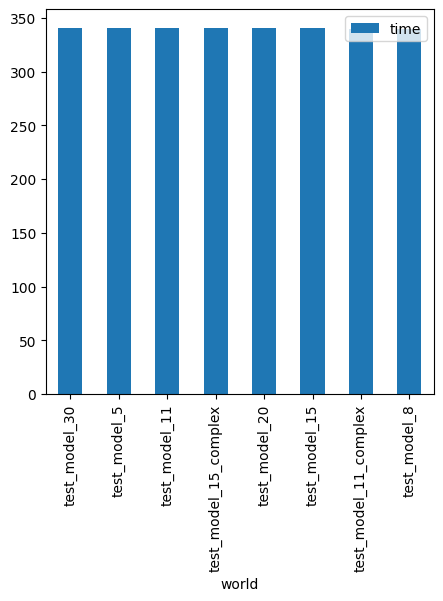

In [156]:
# time vs world
df_par.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world.png', bbox_inches='tight')
plt.show()

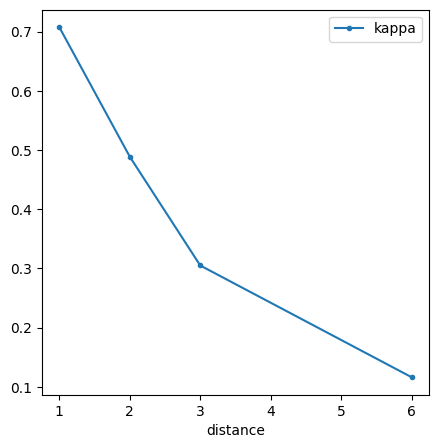

In [157]:
# kappa vs distance
df_par.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

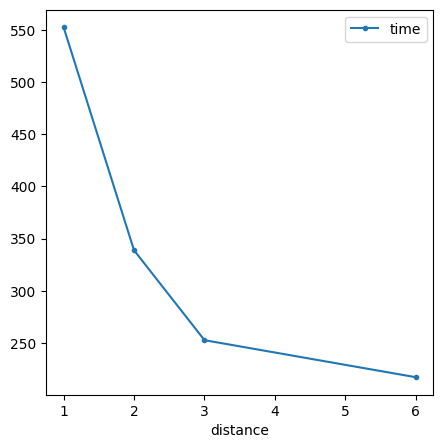

In [158]:
# time vs distance
df_par.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_distance.png', bbox_inches='tight')
plt.show()

## Ski nordique

In [159]:
df_sn = df.loc[df['mission'] == 'ski_nordique']
df_sn

,mission,world,distance,stride,kappa,time
32,ski_nordique,test_model_5,6.0,1.0,0.32,447.06
33,ski_nordique,test_model_5,6.0,2.0,0.38,491.01
34,ski_nordique,test_model_5,6.0,3.0,0.59,543.42
35,ski_nordique,test_model_5,6.0,6.0,0.55,701.10
36,ski_nordique,test_model_5,3.0,1.0,0.48,768.98
...,...,...,...,...,...,...
136,ski_nordique,test_model_11_complex,2.0,1.0,0.79,1100.34
137,ski_nordique,test_model_11_complex,2.0,2.0,0.71,1250.08
138,ski_nordique,test_model_11_complex,2.0,3.0,0.70,1432.01
139,ski_nordique,test_model_11_complex,2.0,6.0,0.66,1962.81


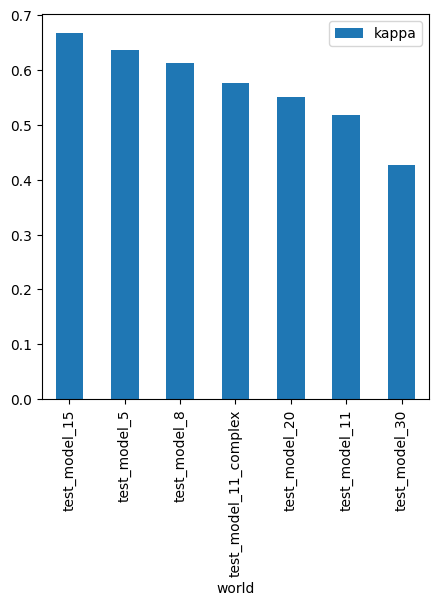

In [160]:
# kappa vs world
df_sn.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_world.png', bbox_inches='tight')
plt.show()

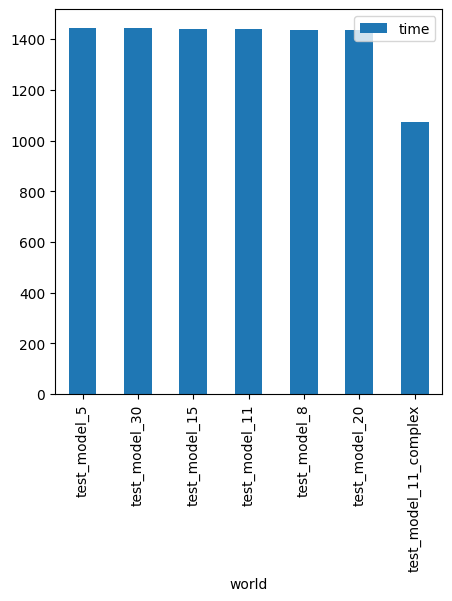

In [161]:
# time vs world
df_sn.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_world.png', bbox_inches='tight')
plt.show()

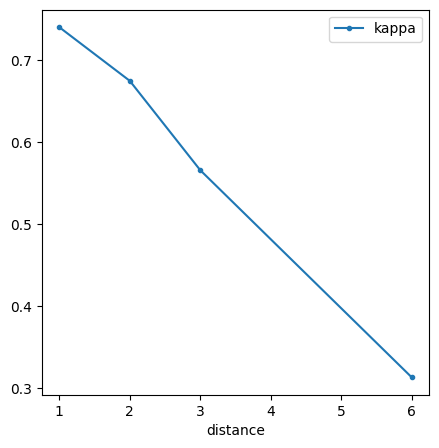

In [162]:
# kappa vs distance
df_sn.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

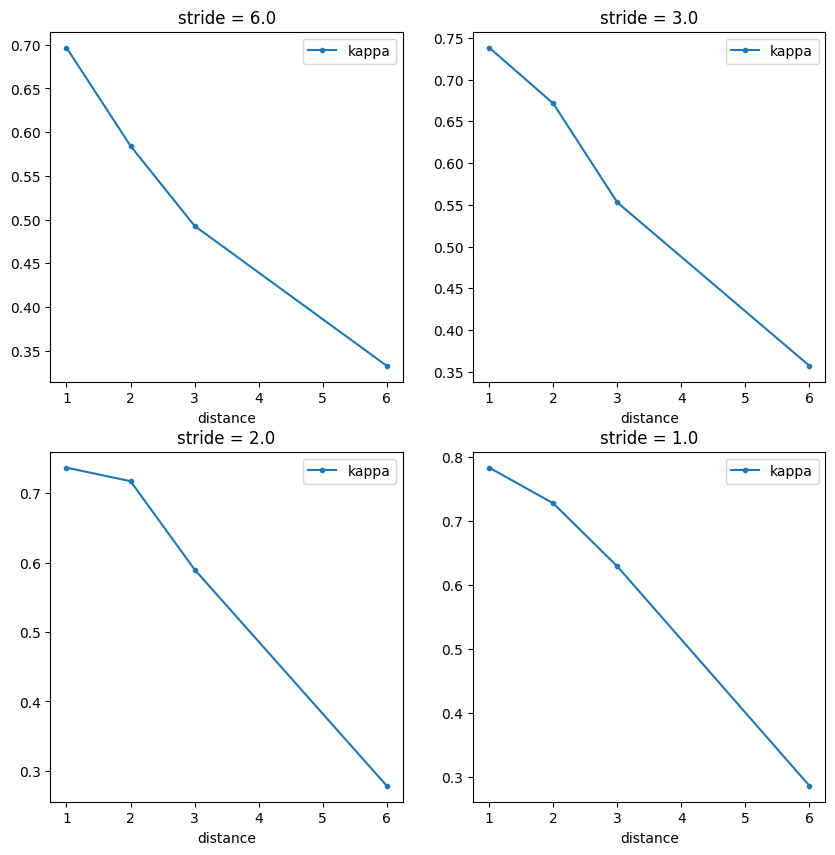

In [163]:
# kappa vs distance, specific stride
df_sn_6 = df_sn.loc[df_sn['stride'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['stride'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['stride'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['stride'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

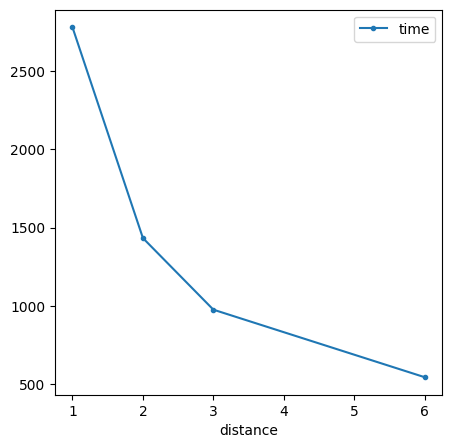

In [164]:
# time vs distance
df_sn.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance.png', bbox_inches='tight')
plt.show()

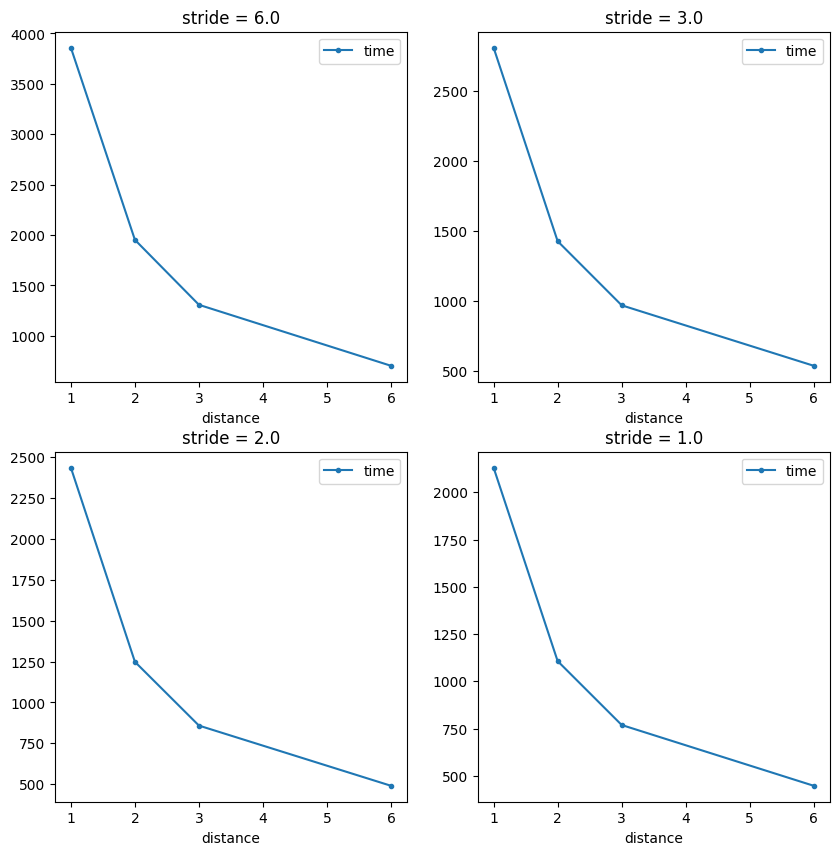

In [165]:
# time vs distance, specific stride
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

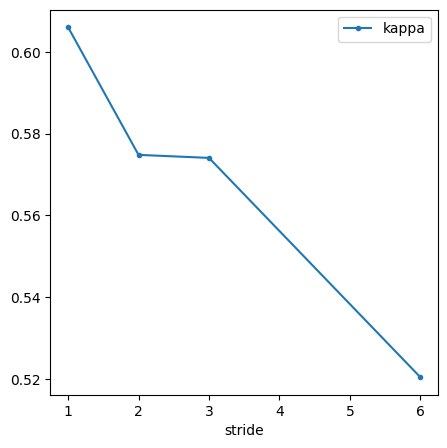

In [166]:
# kappa vs stride
df_sn.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride.png', bbox_inches='tight')
plt.show()

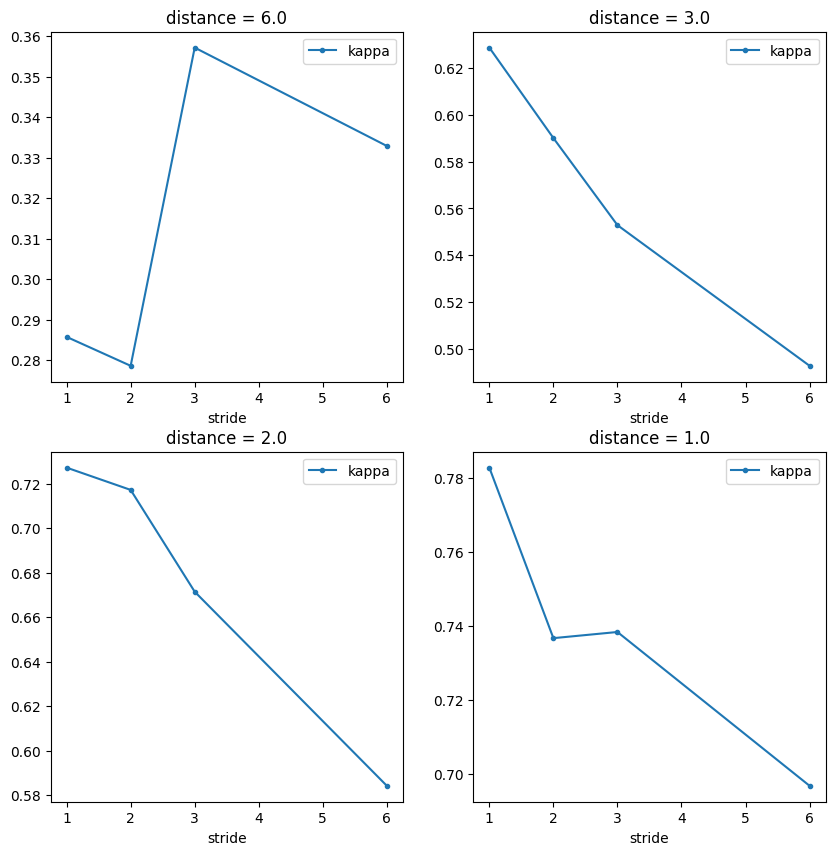

In [167]:
# kappa vs stride, specific distance
df_sn_6 = df_sn.loc[df_sn['distance'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['distance'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['distance'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['distance'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()

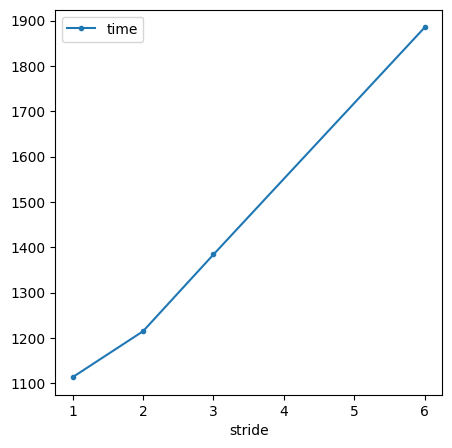

In [168]:
# time vs stride
df_sn.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride.png', bbox_inches='tight')
plt.show()

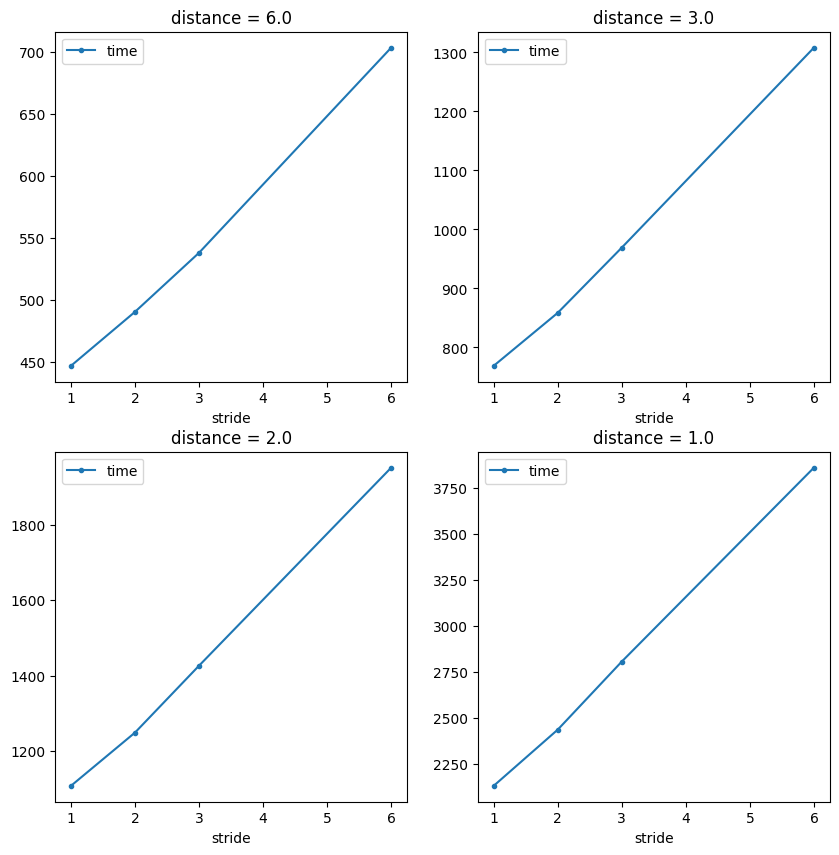

In [169]:
# time vs stride, specific distance
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()

## Peinture au rouleau VS Ski nordique

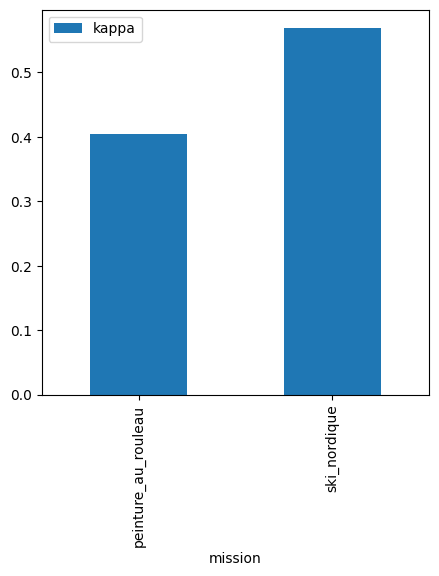

In [4]:
# peinture au rouleau kappa vs ski nordique kappa
df.groupby(['mission'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_ski_nordique-kappa.png', bbox_inches='tight')
plt.show()

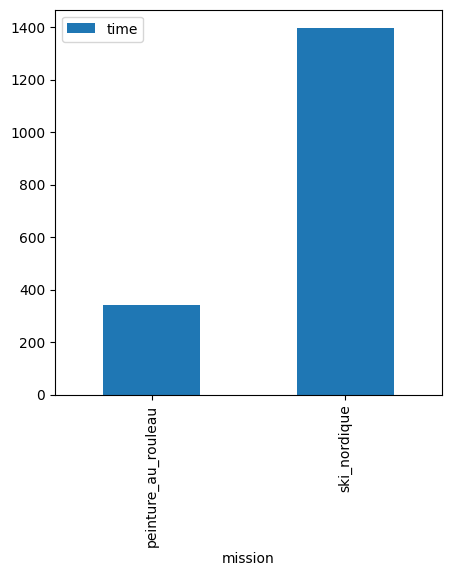

In [5]:
# peinture au rouleau time vs ski nordique time
df.groupby(['mission'])[["time"]].mean().plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_ski_nordique-time.png', bbox_inches='tight')
plt.show()

## Investigation

In [170]:
df = df.loc[df['mission'] == 'investigate']
df

,mission,world,distance,stride,kappa,time


## Tests

In [6]:
import cv2 as cv

test_model_5 = '../graphics/test_model_5.png'
test_model_8 = '../graphics/test_model_8.png'
test_model_11 = '../graphics/test_model_11.png'
test_model_15 = '../graphics/test_model_15.png'
test_model_20 = '../graphics/test_model_20.png'
test_model_30 = '../graphics/test_model_30.png'
test_model_11_complex = '../graphics/test_model_11_complex.png'
test_model_15_complex = '../graphics/test_model_15_complex.png'

def get_density(template):
	l, w, _ = template.shape
	density = 0
	for i in range(l):
		for j in range(w):
			if template[i][j][0] == 0 and template[i][j][1] == 0 and template[i][j][2] == 0:
				density += 1
	print(density)
	return density / (l * w)

print(f'test_model_5: {get_density(cv.imread(test_model_5))}')
print(f'test_model_8: {get_density(cv.imread(test_model_8))}')
print(f'test_model_11: {get_density(cv.imread(test_model_11))}')
print(f'test_model_15: {get_density(cv.imread(test_model_15))}')
print(f'test_model_20: {get_density(cv.imread(test_model_20))}')
print(f'test_model_30: {get_density(cv.imread(test_model_30))}')
print(f'test_model_11_complex: {get_density(cv.imread(test_model_11_complex))}')
print(f'test_model_15_complex: {get_density(cv.imread(test_model_15_complex))}')

16816
test_model_5: 0.012894083872887152
33518
test_model_8: 0.02570075542646477
29555
test_model_11: 0.022662027168362263
32049
test_model_15: 0.02457436334694103
47250
test_model_20: 0.03623010602960977
68143
test_model_30: 0.05225033047990897
65082
test_model_11_complex: 0.04990323302897488
114884
test_model_15_complex: 0.08809014817154898


In [5]:
cv.imread(test_model_5).shape

(1142, 1142, 3)